<a href="https://colab.research.google.com/github/KimYongHwi/machine-learning-study/blob/main/natural_language_processing/8_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(Recurrent_Neural_Network%2C_RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 순환 신경망
- 순서가 있는 데이터를 입력으로 받는다.
- 변화하는 입력에 대한 출력을 얻는다.
- 시계열(날씨, 주가 등), 자연어와 같이 시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터

### Feed Forward Network vs Recurrent Network
- Feed Forward Net
  - 일반적인 구조의 신경망
  - 입력 -> 은닉 -> 출력층으로 이어지는 단방향 구조
  - 이전 스텝의 출력의 영향을 받지 않음
- Recurrent Net
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조
  - 각 스텝마다 이전 상태를 기억하는 시스템(Memory System)  
  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>

### 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함
- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달
- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

### 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 
  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification
  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation
  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)



### 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치
- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치
- $h$는 '상태'를 기억
- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`
- 출력: `(timesteps, output_features)`

In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)
final_output_sequence

array([[1.        , 1.        , 0.99999993, ..., 0.99999997, 0.99999997,
        0.99999999],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

### 케라스의 순환층
- `SimpleRNN` layer
- 입력: `batch_size, timesteps, input_features``
- 출력
  - `return_sequences`로 결정할 수 있다.
  - 3D tensor
    - 타입스텝의 출력을 모은 전체 시퀀스를 반환한다.
    - `batch_size, timesteps, output_features`
  - 2D tensor
    - 입력 시퀀스에 대한 마지막 출력만 반환한다.
    - `batch_size, timesteps, output_features`

In [3]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있다.
  - 이런 설정에서는 중간층이 전체 출력 시퀀스를 반환하도록 설정해야한다.

In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### IMDB

In [7]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [8]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
# 이 데이터는 토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태이다.
# IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여했다.
# 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높다.
print(input_train[0])
print(input_test[0])
print(input_train.shape)
print(input_test.shape)

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

print(input_train.shape)
print(input_test.shape)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4,

In [9]:
# 모델 구성
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()
model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 모델 학습
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 71s 426ms/step - loss: 0.6764 - acc: 0.5635 - val_loss: 0.6451 - val_acc: 0.6230
Epoch 2/10
157/157 [==============================] - 65s 417ms/step - loss: 0.4804 - acc: 0.7771 - val_loss: 0.3966 - val_acc: 0.8298
Epoch 3/10
157/157 [==============================] - 65s 416ms/step - loss: 0.3212 - acc: 0.8651 - val_loss: 0.4372 - val_acc: 0.8248
Epoch 4/10
157/157 [==============================] - 65s 415ms/step - loss: 0.2327 - acc: 0.9091 - val_loss: 0.4719 - val_acc: 0.8382
Epoch 5/10
157/157 [==============================] - 66s 417ms/step - loss: 0.1822 - acc: 0.9337 - val_loss: 0.4661 - val_acc: 0.8356
Epoch 6/10
157/157 [==============================] - 66s 419ms/step - loss: 0.1258 - acc: 0.9567 - val_loss: 0.4524 - val_acc: 0.8200
Epoch 7/10
157/157 [==============================] - 65s 415ms/step - loss: 0.0824 - acc: 0.9730 - val_loss: 0.5937 - val_acc: 0.7704
Epoch 8/10
157/157 [==============================] - 6

In [12]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

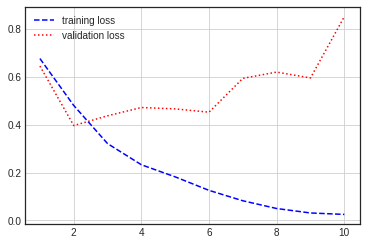

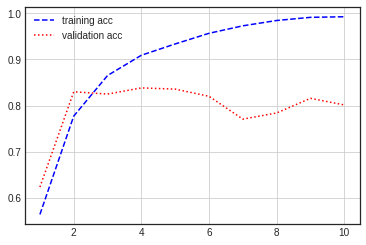

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()

plt.show()

In [14]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 25s 32ms/step - loss: 0.8259 - acc: 0.8000


[0.8258926272392273, 0.800000011920929]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나왔다.
- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않고 실전에 사용하기에는 너무 단순하다.
- SimpleRNN은 이론적으로 시간 $t$에서 이전의 모든 다입스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없다.
- 그레이언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어를 사용한다.

### LSTM(Long Short Term Memmory)
- 장단기 메모리 알고리즘이다.
- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아준다.

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>


In [15]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
num_words = 10000
max_len = 500

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
# 이 데이터는 토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태이다.
# IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여했다.
# 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높다.
print(input_train[0])
print(input_test[0])
print(input_train.shape)
print(input_test.shape)

input_train = pad_sequences(input_train, maxlen=max_len)
input_test = pad_sequences(input_test, maxlen=max_len)

print(input_train.shape)
print(input_test.shape)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4,

In [17]:
# 모델 구성
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [18]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 9s 28ms/step - loss: 0.5000 - acc: 0.7714 - val_loss: 0.3293 - val_acc: 0.8666
Epoch 2/10
157/157 [==============================] - 4s 25ms/step - loss: 0.2945 - acc: 0.8850 - val_loss: 0.2980 - val_acc: 0.8872
Epoch 3/10
157/157 [==============================] - 4s 25ms/step - loss: 0.2297 - acc: 0.9133 - val_loss: 0.3156 - val_acc: 0.8642
Epoch 4/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2010 - acc: 0.9248 - val_loss: 0.2856 - val_acc: 0.8800
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1761 - acc: 0.9360 - val_loss: 0.3096 - val_acc: 0.8694
Epoch 6/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1591 - acc: 0.9422 - val_loss: 0.3656 - val_acc: 0.8566
Epoch 7/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1395 - acc: 0.9493 - val_loss: 0.3219 - val_acc: 0.8870
Epoch 8/10
157/157 [==============================] - 4s 26ms/step - 

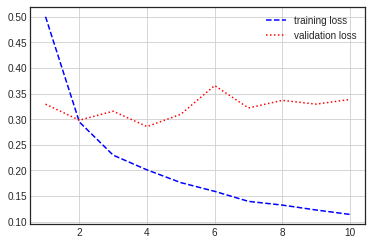

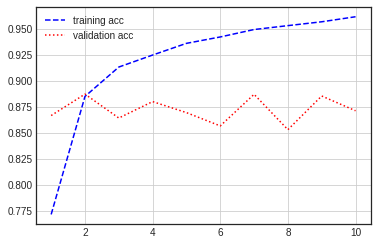

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()

plt.show()

In [21]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.3763 - acc: 0.8533


[0.37631067633628845, 0.8532800078392029]

### GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조
- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있다.
- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정
  - $r$ 값이 결정
- update gate
  -  은닉 상태를 갱신하는 게이트  
  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)
- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


In [22]:
from tensorflow.keras.datasets import reuters

In [23]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train[0])
print(y_train[0])

print(x_train.shape)
print(y_train.shape)

2113536/2110848 [==============================] - 0s 0us/step
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
(8982,)
(8982,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [24]:
max_len = 300

pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

print(pad_x_train.shape)

(8982, 300)


In [25]:
from tensorflow.keras.layers import GRU

In [26]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='acc')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
gru (GRU)                    (None, None, 256)         394752    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dense_2 (Dense)              (None, 46)                5934      
Total params: 3,108,910
Trainable params: 3,108,910
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(pad_x_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 17s 64ms/step - loss: 1.9986 - acc: 0.4850 - val_loss: 1.7106 - val_acc: 0.5576
Epoch 2/20
225/225 [==============================] - 13s 58ms/step - loss: 1.5265 - acc: 0.6142 - val_loss: 1.4696 - val_acc: 0.6299
Epoch 3/20
225/225 [==============================] - 13s 58ms/step - loss: 1.1945 - acc: 0.6920 - val_loss: 1.3489 - val_acc: 0.6639
Epoch 4/20
225/225 [==============================] - 13s 58ms/step - loss: 0.9200 - acc: 0.7638 - val_loss: 1.3301 - val_acc: 0.6778
Epoch 5/20
225/225 [==============================] - 14s 62ms/step - loss: 0.7091 - acc: 0.8110 - val_loss: 1.3388 - val_acc: 0.6973
Epoch 6/20
225/225 [==============================] - 14s 61ms/step - loss: 0.5368 - acc: 0.8598 - val_loss: 1.3653 - val_acc: 0.6956
Epoch 7/20
225/225 [==============================] - 13s 58ms/step - loss: 0.4041 - acc: 0.8970 - val_loss: 1.4280 - val_acc: 0.6995
Epoch 8/20
225/225 [==============================] - 13s 59ms

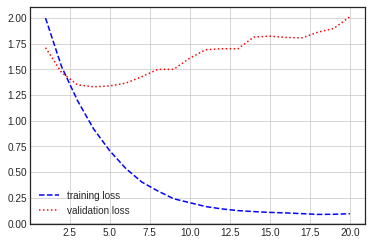

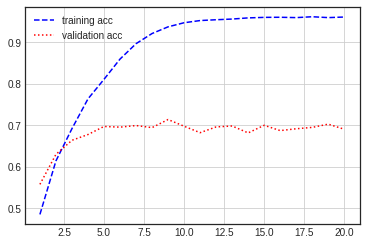

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()

plt.show()

In [29]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 14ms/step - loss: 2.0886 - acc: 0.6736


[2.0886287689208984, 0.6736420392990112]